## Freezing parameters

### Test 1.a
- Use required_grad=False and grad=none to force freeze the layer
- Use default Adam optimizer
- Do not add paramgroup to model after unfreezing layer

In [8]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


# define random data
random_input = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)
#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

# define net
net = Net()

# define optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.1)
#optimizer = optim.SGD(net.parameters(), lr=0.1)
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)

# print the initial fc2 weight
print('fc2 weight before train :')
print(net.fc2.weight)

# we want to freeze the fc2 layer: only train fc1 and fc3
net.fc2.weight.requires_grad = False
net.fc2.bias.requires_grad = False
# In Adam optimizer the parameter updates are not based solely on the gradient at the current step but on an average of past squared gradients. Therefore, unset also the gradients of net.fc2 all together instead of having them as zero tensors (because of the zero_grad). 
net.fc2.weight.grad = None
net.fc2.bias.grad = None

for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the trained fc2 weight
# note that the weight is same as the one before training: only fc1 & fc3 changed
print('fc2 weight (frozen) after retrain:')
print(net.fc2.weight)

# let's unfreeze the fc2 layer this time for extra tuning
net.fc2.weight.requires_grad = True
net.fc2.bias.requires_grad = True
#net.fc2.weight.grad = torch.zeros_like(net.fc2.weight)
#net.fc2.bias.grad = torch.zeros_like(net.fc2.bias)

# re-retrain
for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the re-retrained fc2 weight
# note that this time the fc2 weight also changed
print('fc2 weight (unfrozen) after re-retrain:')
print(net.fc2.weight)

# let's freeze the fc2 layer again
net.fc2.weight.requires_grad = False
net.fc2.bias.requires_grad = False
net.fc2.weight.grad = None
net.fc2.bias.grad = None


# re-retrain
for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the re-retrained fc2 weight
# note that this time the fc2 weight also changed, BUT why?
print('fc2 weight (freeze again) after re-retrain:')
print(net.fc2.weight)

fc2 weight before train :
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]], requires_grad=True)
fc2 weight (frozen) after retrain:
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]])
fc2 weight (unfrozen) after re-retrain:
Parameter containing:
tensor([[ 0.3715,  0.1309, -0.0031,  0.1554, -0.1729],
        [-0.2248, -0.2089, -0.2611,  0.4118,  0.1516],
        [ 0.2117, -0.4130,  0.3157,  0.2232,  0.1875],
        [-0.1910,  0.1295,  0.4166,  0.2696,  0.4489],
        [-0.0478,  0.2866, -0.3830,  0.13

In [7]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

def freeze_params(model, params, freeze=True):
    for name, param in model.named_parameters():
        if any(ext in name for ext in params):
            param.requires_grad = False if freeze else True
            param.grad = None if freeze else param.grad

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

params = ['fc2']

# define random data
random_input = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)
#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

# define net
net = Net()

# define optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.1)
#optimizer = optim.SGD(net.parameters(), lr=0.1)
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)

# print the initial fc2 weight
print('fc2 weight before train :')
print(net.fc2.weight)

# we want to freeze the fc2 layer: only train fc1 and fc3
freeze_params(net, params, freeze=True)


for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the trained fc2 weight
# note that the weight is same as the one before training: only fc1 & fc3 changed
print('fc2 weight (frozen) after retrain:')
print(net.fc2.weight)

# let's unfreeze the fc2 layer this time for extra tuning
freeze_params(net, params, freeze=False)

# re-retrain
for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the re-retrained fc2 weight
# note that this time the fc2 weight also changed
print('fc2 weight (unfrozen) after re-retrain:')
print(net.fc2.weight)

# let's freeze the fc2 layer again
freeze_params(net, params, freeze=True)

# re-retrain
for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the re-retrained fc2 weight
# note that this time the fc2 weight also changed, BUT why?
print('fc2 weight (freeze again) after re-retrain:')
print(net.fc2.weight)

fc2 weight before train :
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]], requires_grad=True)
fc2 weight (frozen) after retrain:
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]])
fc2 weight (unfrozen) after re-retrain:
Parameter containing:
tensor([[ 0.3715,  0.1309, -0.0031,  0.1554, -0.1729],
        [-0.2248, -0.2089, -0.2611,  0.4118,  0.1516],
        [ 0.2117, -0.4130,  0.3157,  0.2232,  0.1875],
        [-0.1910,  0.1295,  0.4166,  0.2696,  0.4489],
        [-0.0478,  0.2866, -0.3830,  0.13

### Test 1.b

In [7]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# define random data
#random_input = Variable(torch.randn(10,))
#random_target = Variable(torch.randn(1,))

random_input = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)

#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

# define net
net = Net()

# define optimizer
criterion = nn.MSELoss()
#optimizer = optim.Adam(net.parameters(), lr=0.1)
#optimizer = optim.SGD(net.parameters(), lr=0.1)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)

# print the initial fc2 weight
print('fc2 weight before train :')
print(net.fc2.weight)

# we want to freeze the fc2 layer: only train fc1 and fc3
net.fc2.weight.requires_grad = False
net.fc2.bias.requires_grad = False
#net.fc2.weight.grad = None
#net.fc2.bias.grad = None

for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the trained fc2 weight
# note that the weight is same as the one before training: only fc1 & fc3 changed
print('fc2 weight (frozen) after retrain:')
print(net.fc2.weight)

# let's unfreeze the fc2 layer this time for extra tuning
net.fc2.weight.requires_grad = True
net.fc2.bias.requires_grad = True
#net.fc2.weight.grad = torch.zeros_like(net.fc2.weight)
#net.fc2.bias.grad = torch.zeros_like(net.fc2.bias)

# add the unfrozen fc2 weight to the current optimizer
#optimizer.add_param_group({'params': net.fc2.parameters()})

# re-retrain
for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the re-retrained fc2 weight
# note that this time the fc2 weight also changed
print('fc2 weight (unfrozen) after re-retrain:')
print(net.fc2.weight)

# let's freeze the fc2 layer again
net.fc2.weight.requires_grad = False
net.fc2.bias.requires_grad = False
#net.fc2.weight.grad = None
#net.fc2.bias.grad = None

# re-retrain
for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the re-retrained fc2 weight
# note that this time the fc2 weight also changed, BUT why?
print('fc2 weight (freeze again) after re-retrain:')
print(net.fc2.weight)

fc2 weight before train :
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]], requires_grad=True)
fc2 weight (frozen) after retrain:
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]])
fc2 weight (unfrozen) after re-retrain:
Parameter containing:
tensor([[ 0.3715,  0.1309, -0.0031,  0.1554, -0.1729],
        [-0.2248, -0.2089, -0.2611,  0.4118,  0.1516],
        [ 0.2117, -0.4130,  0.3157,  0.2232,  0.1875],
        [-0.1910,  0.1295,  0.4166,  0.2696,  0.4489],
        [-0.0478,  0.2866, -0.3830,  0.13

### Test 2.a

In [21]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 124
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


# define random data
random_input = Variable(torch.randn(10,))
random_target = Variable(torch.randn(1,))

# define net
net = Net()

# print fc2 weight
print('fc2 weight before train:')
print(net.fc2.weight)

# train the net
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)
for i in range(100):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the trained fc2 weight
print('fc2 weight after train:')
print(net.fc2.weight)

# save the net
torch.save(net.state_dict(), 'model')

# delete and redefine the net
del net
net = Net()

# load the weight
net.load_state_dict(torch.load('model'))

# print the pre-trained fc2 weight
print('fc2 pretrained weight (same as the one above):')
print(net.fc2.weight)

# define new random data
random_input = Variable(torch.randn(10,))
random_target = Variable(torch.randn(1,))

# we want to freeze the fc2 layer this time: only train fc1 and fc3
net.fc2.weight.requires_grad = False
net.fc2.bias.requires_grad = False
#net.fc2.weight.grad = None
#net.fc2.bias.grad = None

# train again
criterion = nn.MSELoss()

# NOTE: pytorch optimizer explicitly accepts parameter that requires grad
# see https://github.com/pytorch/pytorch/issues/679
optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)
# this raises ValueError: optimizing a parameter that doesn't require gradients
#optimizer = optim.Adam(net.parameters(), lr=0.1)

for i in range(100):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the retrained fc2 weight
# note that the weight is same as the one before retraining: only fc1 & fc3 changed
print('fc2 weight (frozen) after retrain:')
print(net.fc2.weight)

# let's unfreeze the fc2 layer this time for extra tuning
net.fc2.weight.requires_grad = True
net.fc2.bias.requires_grad = True

# add the unfrozen fc2 weight to the current optimizer
optimizer.add_param_group({'params': net.fc2.parameters()})

# re-retrain
for i in range(100):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the re-retrained fc2 weight
# note that this time the fc2 weight also changed
print('fc2 weight (unfrozen) after re-retrain:')
print(net.fc2.weight)

fc2 weight before train:
Parameter containing:
tensor([[-0.3703, -0.3340,  0.1541, -0.2650,  0.2642],
        [ 0.3688,  0.1676, -0.3093, -0.1919, -0.0269],
        [ 0.1880, -0.2799, -0.3967, -0.3259, -0.4128],
        [ 0.0453,  0.2523, -0.2920,  0.0482,  0.3641],
        [ 0.1120,  0.0288,  0.1036,  0.3823, -0.2721]], requires_grad=True)
fc2 weight after train:
Parameter containing:
tensor([[-0.2833, -0.3700,  0.1228, -0.3608,  0.1716],
        [ 0.4600,  0.1327, -0.3391, -0.2903, -0.1227],
        [ 0.2085, -0.2775, -0.3930, -0.3414, -0.4281],
        [ 0.0494,  0.2465, -0.2973,  0.0421,  0.3560],
        [ 0.1444,  0.0159,  0.0918,  0.3451, -0.3039]], requires_grad=True)
fc2 pretrained weight (same as the one above):
Parameter containing:
tensor([[-0.2833, -0.3700,  0.1228, -0.3608,  0.1716],
        [ 0.4600,  0.1327, -0.3391, -0.2903, -0.1227],
        [ 0.2085, -0.2775, -0.3930, -0.3414, -0.4281],
        [ 0.0494,  0.2465, -0.2973,  0.0421,  0.3560],
        [ 0.1444,  0.0159,

### Test 2.b

In [9]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 124
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


# define random data
random_input = Variable(torch.randn(10,))
random_target = Variable(torch.randn(1,))

# define net
net = Net()

# print fc2 weight
print('fc2 weight before train:')
print(net.fc2.weight)

# train the net
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)
for i in range(100):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the trained fc2 weight
print('fc2 weight after train:')
print(net.fc2.weight)

# save the net
torch.save(net.state_dict(), 'model')

# delete and redefine the net
del net
net = Net()

# load the weight
net.load_state_dict(torch.load('model'))

# print the pre-trained fc2 weight
print('fc2 pretrained weight (same as the one above):')
print(net.fc2.weight)

# define new random data
random_input = Variable(torch.randn(10,))
random_target = Variable(torch.randn(1,))

# we want to freeze the fc2 layer this time: only train fc1 and fc3
net.fc2.weight.requires_grad = False
net.fc2.bias.requires_grad = False
net.fc2.weight.grad = None
net.fc2.bias.grad = None

# train again
criterion = nn.MSELoss()

# NOTE: pytorch optimizer explicitly accepts parameter that requires grad
# see https://github.com/pytorch/pytorch/issues/679
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)
# this raises ValueError: optimizing a parameter that doesn't require gradients
optimizer = optim.Adam(net.parameters(), lr=0.1)

for i in range(100):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the retrained fc2 weight
# note that the weight is same as the one before retraining: only fc1 & fc3 changed
print('fc2 weight (frozen) after retrain:')
print(net.fc2.weight)

# let's unfreeze the fc2 layer this time for extra tuning
net.fc2.weight.requires_grad = True
net.fc2.bias.requires_grad = True

# add the unfrozen fc2 weight to the current optimizer
#optimizer.add_param_group({'params': net.fc2.parameters()})

# re-retrain
for i in range(100):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the re-retrained fc2 weight
# note that this time the fc2 weight also changed
print('fc2 weight (unfrozen) after re-retrain:')
print(net.fc2.weight)

fc2 weight before train:
Parameter containing:
tensor([[-0.3703, -0.3340,  0.1541, -0.2650,  0.2642],
        [ 0.3688,  0.1676, -0.3093, -0.1919, -0.0269],
        [ 0.1880, -0.2799, -0.3967, -0.3259, -0.4128],
        [ 0.0453,  0.2523, -0.2920,  0.0482,  0.3641],
        [ 0.1120,  0.0288,  0.1036,  0.3823, -0.2721]], requires_grad=True)
fc2 weight after train:
Parameter containing:
tensor([[-0.2833, -0.3700,  0.1228, -0.3608,  0.1716],
        [ 0.4600,  0.1327, -0.3391, -0.2903, -0.1227],
        [ 0.2085, -0.2775, -0.3930, -0.3414, -0.4281],
        [ 0.0494,  0.2465, -0.2973,  0.0421,  0.3560],
        [ 0.1444,  0.0159,  0.0918,  0.3451, -0.3039]], requires_grad=True)
fc2 pretrained weight (same as the one above):
Parameter containing:
tensor([[-0.2833, -0.3700,  0.1228, -0.3608,  0.1716],
        [ 0.4600,  0.1327, -0.3391, -0.2903, -0.1227],
        [ 0.2085, -0.2775, -0.3930, -0.3414, -0.4281],
        [ 0.0494,  0.2465, -0.2973,  0.0421,  0.3560],
        [ 0.1444,  0.0159,

In [62]:
x = torch.randn(2, 2)
x.requires_grad = True

lin0 = nn.Linear(2, 2)
lin1 = nn.Linear(2, 2)
lin2 = nn.Linear(2, 2)
x1 = lin0(x)
with torch.no_grad():    
    x2 = lin1(x1)
x3 = lin2(x2)
x3.sum().backward()
print('lin0:', lin0.weight.grad)
print('lin1:', lin1.weight.grad)
print('lin2:', lin2.weight.grad)

lin0: None
lin1: None
lin2: tensor([[-1.2708,  0.6635],
        [-1.2708,  0.6635]])


In [53]:
x = torch.randn(2, 2)
x.requires_grad = True

lin0 = nn.Linear(2, 2)
lin1 = nn.Linear(2, 2)
lin2 = nn.Linear(2, 2)
x1 = lin0(x)
x2 = lin1(x1)
# with torch.no_grad():    
#     x2 = lin1(x1)
x3 = lin2(x2)
x3.sum().backward()
print('lin0:', lin0.weight.grad)
print('lin1:', lin1.weight.grad)
print('lin2:', lin2.weight.grad)

lin0: tensor([[ 0.0368, -0.0246],
        [ 0.2934, -0.1960]])
lin1: tensor([[-0.8294,  1.1526],
        [ 0.1166, -0.1621]])
lin2: tensor([[-1.9462, -0.6254],
        [-1.9462, -0.6254]])


In [14]:
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.relu1 = nn.ReLU()
        #dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(4, 3)
        self.relu2 = nn.ReLU(1)
        self.out = nn.Linear(3, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, inputs):
        a1 = self.fc1(inputs)
        h1 = self.relu1(a1)
        a2 = self.fc2(h1)
        h2 = self.relu2(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y

In [15]:
net = Net()
params = net.state_dict()
params.keys()

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'out.weight', 'out.bias'])

In [16]:
for name, param in net.named_parameters():
    if param.requires_grad:print(name)

fc1.weight
fc1.bias
fc2.weight
fc2.bias
out.weight
out.bias


In [18]:
for name, param in net.named_parameters():
    if param.requires_grad and 'fc1' in name:
        param.requires_grad = False

for name, param in net.named_parameters():print(name, param)

fc1.weight Parameter containing:
tensor([[ 0.0828, -0.5417],
        [ 0.0817,  0.2378],
        [ 0.6045, -0.2202],
        [ 0.2546,  0.7068]])
fc1.bias Parameter containing:
tensor([-0.3033,  0.6722, -0.3511,  0.3117])
fc2.weight Parameter containing:
tensor([[ 0.1959,  0.1397,  0.3954, -0.2021],
        [ 0.1314,  0.0028, -0.3761, -0.1214],
        [-0.3339,  0.2211,  0.0449,  0.0490]], requires_grad=True)
fc2.bias Parameter containing:
tensor([-0.1517,  0.0024, -0.1555], requires_grad=True)
out.weight Parameter containing:
tensor([[0.1659, 0.5607, 0.0875]], requires_grad=True)
out.bias Parameter containing:
tensor([-0.2557], requires_grad=True)


In [19]:
optimizer = optim.SGD(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)

## Concatenate tensors

### Using cat()

In [3]:
# Python program to join tensors in PyTorch
# import necessary library
import torch

# create tensors
T1 = torch.Tensor([1,2,3,4])
T2 = torch.Tensor([0,3,4,1])
T3 = torch.Tensor([4,3,2,5])

# print above created tensors
print("T1:", T1)
print("T2:", T2)
print("T3:", T3)

# join (concatenate) above tensors using torch.cat()
T = torch.cat((T1,T2,T3))
# print final tensor after concatenation
print("T:",T)


T1: tensor([1., 2., 3., 4.])
T2: tensor([0., 3., 4., 1.])
T3: tensor([4., 3., 2., 5.])
T: tensor([1., 2., 3., 4., 0., 3., 4., 1., 4., 3., 2., 5.])


In [19]:
# import necessary library
import torch

# create tensors
T1 = torch.Tensor([[1,2],[3,4]])
T2 = torch.Tensor([[0,3],[4,1]])
T3 = torch.Tensor([[4,3],[2,5]])

# print above created tensors
print("T1:\n", T1)
print("T2:\n", T2)
print("T3:\n", T3)

print("join(concatenate) tensors in the 0 dimension")
T = torch.cat((T1,T2,T3), 0)
print("T:\n", T)

print("join(concatenate) tensors in the -1 dimension")
T = torch.cat((T1,T2,T3), -1)
print("T:\n", T)

T1:
 tensor([[1., 2.],
        [3., 4.]])
T2:
 tensor([[0., 3.],
        [4., 1.]])
T3:
 tensor([[4., 3.],
        [2., 5.]])
join(concatenate) tensors in the 0 dimension
T:
 tensor([[1., 2.],
        [3., 4.],
        [0., 3.],
        [4., 1.],
        [4., 3.],
        [2., 5.]])
join(concatenate) tensors in the -1 dimension
T:
 tensor([[1., 2., 0., 3., 4., 3.],
        [3., 4., 4., 1., 2., 5.]])


In [20]:
import torch

a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

ab = torch.cat((a, b), 0)
ba = torch.cat((b, a), 0)
print('a:', a)
print('b:', b)
print('ab:', ab)
print('ba:', ba)
print('a shape:', a.shape)
print('ab shape:', ab.shape)

c_ = torch.tensor([[1, 2, 3],[4, 5, 6]])
d_ = torch.tensor([[7, 8, 9],[10,11, 12]])
c = c_.reshape(3,2)
d = d_.reshape(3,2)

cd = torch.cat((c, d))
dc = torch.cat((d, c))
print('c:', c)
print('d:', d)
print('cd:', cd)
print('dc:', dc)
print('c shape:', c.shape)
print('cd shape:', cd.shape)

cd1 = torch.cat((c, d), 1)
dc1 = torch.cat((d, c), 1)
print('cd1:', cd1)
print('cd1 shape:', cd1.shape)



a: tensor([1, 2, 3])
b: tensor([4, 5, 6])
ab: tensor([1, 2, 3, 4, 5, 6])
ba: tensor([4, 5, 6, 1, 2, 3])
a shape: torch.Size([3])
ab shape: torch.Size([6])
c: tensor([[1, 2],
        [3, 4],
        [5, 6]])
d: tensor([[ 7,  8],
        [ 9, 10],
        [11, 12]])
cd: tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10],
        [11, 12]])
dc: tensor([[ 7,  8],
        [ 9, 10],
        [11, 12],
        [ 1,  2],
        [ 3,  4],
        [ 5,  6]])
c shape: torch.Size([3, 2])
cd shape: torch.Size([6, 2])
cd1: tensor([[ 1,  2,  7,  8],
        [ 3,  4,  9, 10],
        [ 5,  6, 11, 12]])
cd1 shape: torch.Size([3, 4])


In [21]:
import torch

a = torch.tensor([[1, 2, 3]])
b = torch.tensor([[4, 5, 6]])

print('0:', torch.cat((a, b), 0))
print('1:', torch.cat((a, b), 1))

0: tensor([[1, 2, 3],
        [4, 5, 6]])
1: tensor([[1, 2, 3, 4, 5, 6]])


### Using stack()

In [22]:
# Python program to join tensors in PyTorch
# import necessary library
import torch

# create tensors
T1 = torch.Tensor([1,2,3,4])
T2 = torch.Tensor([0,3,4,1])
T3 = torch.Tensor([4,3,2,5])

# print above created tensors
print("T1:", T1)
print("T2:", T2)
print("T3:", T3)

# join above tensor using "torch.stack()"
print("join(stack) tensors")
T = torch.stack((T1,T2,T3))

# print final tensor after join
print("T:\n",T)
print("join(stack) tensors in the 0 dimension")
T = torch.stack((T1,T2,T3), 0)

print("T:\n", T)
print("join(stack) tensors in the -1 dimension")
T = torch.stack((T1,T2,T3), -1)
print("T:\n", T)

T1: tensor([1., 2., 3., 4.])
T2: tensor([0., 3., 4., 1.])
T3: tensor([4., 3., 2., 5.])
join(stack) tensors
T:
 tensor([[1., 2., 3., 4.],
        [0., 3., 4., 1.],
        [4., 3., 2., 5.]])
join(stack) tensors in the 0 dimension
T:
 tensor([[1., 2., 3., 4.],
        [0., 3., 4., 1.],
        [4., 3., 2., 5.]])
join(stack) tensors in the -1 dimension
T:
 tensor([[1., 0., 4.],
        [2., 3., 3.],
        [3., 4., 2.],
        [4., 1., 5.]])


In [23]:
# import necessary library
import torch

# create tensors
T1 = torch.Tensor([[1,2],[3,4]])
T2 = torch.Tensor([[0,3],[4,1]])
T3 = torch.Tensor([[4,3],[2,5]])

# print above created tensors
print("T1:\n", T1)
print("T2:\n", T2)
print("T3:\n", T3)

print("Join (stack)tensors in the 0 dimension")
T = torch.stack((T1,T2,T3), 0)
print("T:\n", T)

print("Join(stack) tensors in the -1 dimension")
T = torch.stack((T1,T2,T3), -1)
print("T:\n", T)

T1:
 tensor([[1., 2.],
        [3., 4.]])
T2:
 tensor([[0., 3.],
        [4., 1.]])
T3:
 tensor([[4., 3.],
        [2., 5.]])
Join (stack)tensors in the 0 dimension
T:
 tensor([[[1., 2.],
         [3., 4.]],

        [[0., 3.],
         [4., 1.]],

        [[4., 3.],
         [2., 5.]]])
Join(stack) tensors in the -1 dimension
T:
 tensor([[[1., 0., 4.],
         [2., 3., 3.]],

        [[3., 4., 2.],
         [4., 1., 5.]]])


In [24]:
dictionary = {'Name': 'Kushi', 'Class': 'LKG'}
new_dict= ','.join(map(','.join, dictionary.items()))
print(new_dict)

Name,Kushi,Class,LKG


In [2]:
a = ["apple", "banana", "cherry"]
b = ["Ford", "BMW", "Volvo"]
a.append(b)
print(a)

['apple', 'banana', 'cherry', ['Ford', 'BMW', 'Volvo']]


## Reshape tensors

In [59]:
import torch

procs = 16
num_units = 5
img_size = 64
hidden_size = img_size // num_units
mem_size = num_units*(img_size // num_units)

x = torch.randn(procs, mem_size)
print(x.size())
print(x.size(0))


torch.Size([16, 60])
16


In [58]:
y = x.view(x.size(0),num_units,-1)
print(y.size())

torch.Size([16, 5, 12])


In [22]:
x = torch.randn(2, 4)
print(x)
print(x[1][1])
xx = x.unsqueeze(1)
print(xx)
print(xx[1][0][1])

tensor([[-0.6404,  1.3916,  0.5072,  0.9984],
        [ 0.0878, -0.7080,  0.6619,  0.0041]])
tensor(-0.7080)
tensor([[[-0.6404,  1.3916,  0.5072,  0.9984]],

        [[ 0.0878, -0.7080,  0.6619,  0.0041]]])
tensor(-0.7080)


In [27]:
x = torch.randn(8, 64)
print(x.size())
xx = x.unsqueeze(1)
print(xx.size())

torch.Size([8, 64])
torch.Size([8, 1, 64])


## Optimizer parameter groups

In [8]:
import torch
import torch.optim as optim


w1 = torch.randn(3, 3)
w1.requires_grad = True
w2 = torch.randn(3, 3)
w2.requires_grad = True
o = optim.Adam([w1])
print(o.param_groups)
print(type(o))

[{'params': [tensor([[ 0.8359, -0.2358,  1.7205],
        [ 0.2683, -0.9925,  0.1718],
        [ 0.1968, -0.3249, -0.2430]], requires_grad=True)], 'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}]
<class 'torch.optim.adam.Adam'>


In [9]:
# add new param group with own lr
o.add_param_group({'params': w2, 'lr': 1e-1})
print(o.param_groups)

[{'params': [tensor([[ 0.8359, -0.2358,  1.7205],
        [ 0.2683, -0.9925,  0.1718],
        [ 0.1968, -0.3249, -0.2430]], requires_grad=True)], 'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, {'params': [tensor([[ 0.0881,  0.3921,  1.9908],
        [ 0.4503, -0.3137, -0.7562],
        [-0.6558,  0.7539,  0.6395]], requires_grad=True)], 'lr': 0.1, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}]


In [53]:
import torch.nn as nn
import torch.optim

net = nn.Sequential(
    nn.Linear(1, 3),
    nn.Linear(3, 5),
    nn.Linear(5, 1)
)

opt1 = torch.optim.Adam(params=net[0].parameters(), lr=0.1)
# add several sets of parameters under same group
opt2 = torch.optim.Adam(params=[*net[1].parameters(), *net[2].parameters()], lr=0.001)

In [51]:
print(opt2.param_groups)

[{'params': [Parameter containing:
tensor([[-0.0553, -0.5476,  0.2743],
        [-0.1505, -0.1308,  0.2236],
        [ 0.4361, -0.4416,  0.1806],
        [ 0.1396, -0.5152,  0.2281],
        [-0.2189, -0.5197,  0.1517]], requires_grad=True), Parameter containing:
tensor([ 0.1861,  0.4835, -0.1680,  0.4405,  0.2483], requires_grad=True), Parameter containing:
tensor([[ 0.2723,  0.0223, -0.3387,  0.3122,  0.2869]], requires_grad=True), Parameter containing:
tensor([0.1453], requires_grad=True)], 'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False}]


In [7]:
import torch.nn as nn
import torch.optim

minet = nn.Module()
minet.linear1 = nn.Sequential(
    nn.Linear(1, 3),
    nn.Linear(3, 5),
    nn.Linear(5, 1)
)

minet.linear2 = nn.Sequential(
    nn.Linear(1, 4),
    nn.Linear(4, 8),
    nn.Linear(8, 1)
)

minet.linear3 = nn.Sequential(
    nn.Linear(1, 2),
    nn.Linear(2, 4),
    nn.Linear(4, 1)
)

opt = torch.optim.Adam(params=minet.parameters(), lr=0.1)

In [9]:
print(opt.param_groups)

[{'params': [Parameter containing:
tensor([[ 0.5115],
        [-0.1744],
        [-0.5801]], requires_grad=True), Parameter containing:
tensor([ 0.9481, -0.3183, -0.0052], requires_grad=True), Parameter containing:
tensor([[ 0.3654, -0.1769, -0.0197],
        [ 0.4849, -0.0077, -0.1101],
        [ 0.0595, -0.1652, -0.1800],
        [ 0.4834,  0.4457,  0.5394],
        [ 0.0611, -0.5246,  0.4998]], requires_grad=True), Parameter containing:
tensor([ 0.3877,  0.3558, -0.2553, -0.3426, -0.0570], requires_grad=True), Parameter containing:
tensor([[ 0.2762, -0.4364, -0.1395,  0.0304,  0.3995]], requires_grad=True), Parameter containing:
tensor([0.3906], requires_grad=True), Parameter containing:
tensor([[-0.7687],
        [-0.5739],
        [-0.0855],
        [ 0.7660]], requires_grad=True), Parameter containing:
tensor([-0.1951, -0.3155, -0.1701, -0.3888], requires_grad=True), Parameter containing:
tensor([[-0.3788, -0.3123,  0.4817,  0.4455],
        [ 0.2345, -0.3259, -0.4985,  0.0034],


In [70]:
# delete param_groups after it has been created
del opt.param_groups[0]

In [71]:
# re-assign param_groups
opt.add_param_group({'params': minet.linear1.parameters(), 'lr': 2e-1})
opt.add_param_group({'params': [*minet.linear2.parameters(), *minet.linear3.parameters()], 'lr': 5e-1})

In [72]:
print(opt.param_groups)

[{'params': [Parameter containing:
tensor([[-0.0821],
        [-0.5898],
        [ 0.9587]], requires_grad=True), Parameter containing:
tensor([ 0.0660,  0.3029, -0.7830], requires_grad=True), Parameter containing:
tensor([[-0.0279,  0.0895,  0.4057],
        [-0.3290, -0.2559,  0.0500],
        [-0.0235, -0.5398,  0.0434],
        [-0.3965, -0.2057,  0.3941],
        [ 0.2467,  0.1260,  0.0426]], requires_grad=True), Parameter containing:
tensor([-0.0284, -0.2887,  0.3376,  0.4127, -0.1698], requires_grad=True), Parameter containing:
tensor([[-0.3080, -0.2699, -0.3972, -0.1797, -0.1832]], requires_grad=True), Parameter containing:
tensor([0.2287], requires_grad=True)], 'lr': 0.2, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False}, {'params': [Parameter containing:
tensor([[ 0.9597],
        [-0.2950],
        [-0.0314],
        [-0.0881]], requires_grad=True), Parameter containing:
tensor([ 0.7879, -0.1337

In [49]:
for g in opt.param_groups:
    print(g['lr'])

0.2
0.5


In [ ]:
for g in opt.param_groups:
    g['lr'] = 0.0025

In [ ]:
print(opt.param_groups)

## Tensor operations

In [14]:
import torch
import torch.nn as nn

w = torch.randn(2, 2)
print(w)
print(w.norm(1))
print(w.norm(2))
print(w.pow(2).sum(dim=1).sqrt())

tensor([[ 1.0427, -0.7606],
        [ 0.6839,  0.6828]])
tensor(3.1701)
tensor(1.6124)
tensor([1.2907, 0.9665])


## Misc

In [2]:
import random

threshold = 0.80
window = 10
rreturn_total = 0
i = 0

num_frames = 0
frames = 1000000

while num_frames < frames:
    num_frames+=1
    rreturn_per_episode = random.random()
    rreturn_total +=rreturn_per_episode
    i+=1
    if num_frames < frames:
        if i >= window:
            rreturn_mavg = rreturn_total / i
            if rreturn_mavg >= threshold:
                print(rreturn_mavg) 
                print(num_frames)
                break
            else:
                i = 0
                rreturn_total = 0



0.8229138851824492
32660


In [3]:
a={'a':False}
print(type(a))

<class 'dict'>


In [17]:
import torch
import torch.nn as nn

m = nn.Linear(510, 1)
input = torch.randn(16,510)

output = m(input)
print(output.size())
print(input.unsqueeze(0).shape)

torch.Size([16, 1])
torch.Size([1, 16, 510])


In [6]:
import torch
import torch.nn as nn

nhid = 510
ntoken = 1
decoder = nn.Linear(nhid, ntoken)

output = torch.randn(1,16,510)
print(output.shape)
dec = output.view(output.size(0) * output.size(1), nhid)
print(dec.shape)
#dec = decoder(dec)
print(dec.shape)
x = dec.view(output.size(0), output.size(1), dec.size(1))
print(x.shape)

torch.Size([1, 16, 510])
torch.Size([16, 510])
torch.Size([16, 510])
torch.Size([1, 16, 510])


In [5]:
flag = True
print(flag)
flag = not(flag)
print(flag)
flag = not(flag)
print(flag)

True
False
True


In [ ]:
import numpy as np
a = np.array([[10, 7, 4], [3, 2, 1]])
print(a)
print(np.median(a, axis=0))
print(np.median(a, axis=1))

b = np.array([10, 7, 899, 884])
print(b)
print(np.median(b, axis=0))



In [42]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
print(np.concatenate((a, b), axis=0))

d = np.array(7, ndmin=1)
c = np.concatenate((d, d), axis=0)
print(c)

e = np.array([4,5,6,7], ndmin=2)
e2 = np.array([4,5,6,7], ndmin=2)
e3 = np.concatenate((e, e2), axis=0)
print(e3)

[[1 2]
 [3 4]
 [5 6]]
[7 7]
[[4 5 6 7]
 [4 5 6 7]]


In [2]:
print("\x1B[3mm\x1B[0m")

m


In [37]:
class Student:
    def __init__(self, name_list): 
        name_list = name_list    #name created in constructor 
    def get_student_name(self): 
        return name 
    def assing_new(self):
        for i, name in enumerate(name_list):
            name_list[i] = name.capitalize()
    def get_names(self):
        for name in name_list:
            print(name)

name_list = ['pepe', 'jose', 'carlos']
new_student = Student(name_list)
new_student.get_names()
new_student.assing_new()
new_student.get_names()



pepe
jose
carlos
Pepe
Jose
Carlos


In [27]:
new_student.name_list

[['pepe', 'ok'], ['jose', 'ok'], ['carlos', 'ok']]

In [21]:
a ='fsfs'
a =[a]
a.append('ok')
print(a)

['fsfs', 'ok']


In [20]:
a.append('wfw')
print(a)

['fsfs', 'wfw', 'wfw']


Ejemplo cumsum over a Tensor

In [1]:
import torch

test = torch.tensor([1, 2, 3, 4, 5])
print(test)
print(torch.cumsum(test, dim=0))

tensor([1, 2, 3, 4, 5])
tensor([ 1,  3,  6, 10, 15])


In [7]:
import torch
cascade_depth = 8
results = torch.rand(32)
print(results)
print(tuple(results[i:i+cascade_depth] for i in range(0,len(results), cascade_depth)))

tensor([0.5111, 0.5984, 0.9325, 0.3230, 0.2415, 0.6994, 0.0843, 0.8987, 0.2394,
        0.9355, 0.2707, 0.2377, 0.8491, 0.7620, 0.9087, 0.9858, 0.5329, 0.1053,
        0.1308, 0.8978, 0.4978, 0.9903, 0.9716, 0.9106, 0.2139, 0.8016, 0.8937,
        0.3293, 0.1992, 0.3946, 0.9367, 0.9142])
(tensor([0.5111, 0.5984, 0.9325, 0.3230, 0.2415, 0.6994, 0.0843, 0.8987]), tensor([0.2394, 0.9355, 0.2707, 0.2377, 0.8491, 0.7620, 0.9087, 0.9858]), tensor([0.5329, 0.1053, 0.1308, 0.8978, 0.4978, 0.9903, 0.9716, 0.9106]), tensor([0.2139, 0.8016, 0.8937, 0.3293, 0.1992, 0.3946, 0.9367, 0.9142]))


Ejemplo scatter plot

In [48]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

In [49]:
N = 200
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 250 * r**2
colors = theta

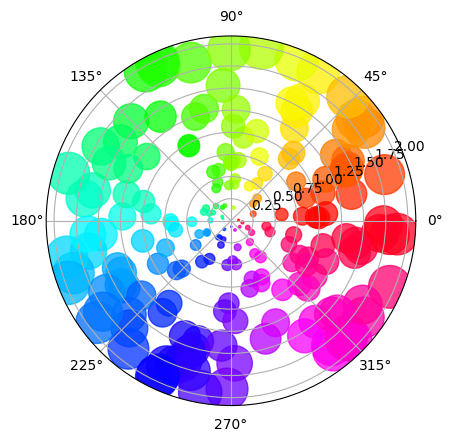

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

Ejemplo Pandas

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import statsmodels.api as sm
#import seaborn
#seaborn.set()

In [64]:
data = [['Monica',16,85,'USA'],['Lisa',16,88,'Brazil'],['Harley',17,65,'Sweeden'],['Roy',18,65,'Brazil'],['Recardo',17,79,'Ireland']]

[['Monica', 16, 85, 'USA'],
 ['Lisa', 16, 88, 'Brazil'],
 ['Harley', 17, 65, 'Sweeden'],
 ['Roy', 18, 65, 'Brazil'],
 ['Recardo', 17, 79, 'Ireland']]

In [67]:
df = pd.DataFrame(data, columns=['Name','Age','Marks','Country'])
df

,Name,Age,Marks,Country
0,Monica,16,85,USA
1,Lisa,16,88,Brazil
2,Harley,17,65,Sweeden
3,Roy,18,65,Brazil
4,Recardo,17,79,Ireland


In [72]:
m = df['Marks'].mean()
print(m)

76.4


In [74]:
df['Results'] = np.where(df['Marks'] >= df['Marks'].mean(), 0.0, 1.0)

In [76]:
print(df['Results'])

0    0.0
1    0.0
2    1.1
3    1.1
4    0.0
Name: Results, dtype: float64


Test range

In [10]:
cascade_depth = 2

print("range(1, cascade_depth)")
for i in range(1, cascade_depth):
    print(i)

print("range(cascade_depth)")
for i in range(cascade_depth):
    print(i)


range(1, cascade_depth)
1
range(cascade_depth)
0
1


Test list of tensors

In [13]:
import torch

test = torch.tensor([1, 2, 3, 4, 5])
test2 = torch.tensor([9, 2, 3, 4, 5])

dist = []
dist.append(test)
print(dist)
dist.append(test2)
print(dist)


[tensor([1, 2, 3, 4, 5])]
[tensor([1, 2, 3, 4, 5]), tensor([9, 2, 3, 4, 5])]


Test numpy swapaxes and reshape1

In [34]:
import numpy as np

def sf01(arr):
    """
    swap and then flatten axes 0 and 1
    """
    s = arr.shape
    return arr.swapaxes(0, 1).reshape(s[0] * s[1], *s[2:])

def sf012(arr):

    s= arr.shape
    return arr.swapaxes(0,2).reshape(s[1]*s[2],s[0],*s[3:])

a = np.arange(12).reshape((3, 2,2))
print(a)
print(a.shape)
#print(sf01(a))

b = a.swapaxes(0,1)
print(b)
s = a.shape
print(*s[2:])
print(sf012(a))

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
(3, 2, 2)
[[[ 0  1]
  [ 4  5]
  [ 8  9]]

 [[ 2  3]
  [ 6  7]
  [10 11]]]
2
[[ 0  4  8]
 [ 2  6 10]
 [ 1  5  9]
 [ 3  7 11]]


Test list of cascaded action-tensors

In [7]:
import torch
import numpy as np
import random

def set_all_seeds(seed):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True

set_all_seeds(2)

cascade_depth = 3
num_frames_per_proc = 8
num_procs = 4

shape = (cascade_depth, num_frames_per_proc, num_procs) 
all_actions = torch.zeros(*shape, dtype=torch.float)

print(*shape)

for i in range(cascade_depth):

    # for i in range(cascade_depth):
    #     n = random.randint(1, 10)
    # actions.append(n)
    for j in range(num_frames_per_proc):
        action = torch.rand(1,num_procs)
        all_actions[i][j] = action

print(all_actions)


shape = (num_frames_per_proc, num_procs) 
actions = []
all_actions = torch.zeros(*shape, dtype=torch.float)
all_actions_cascade = []

for i in range(num_frames_per_proc):

    for j in range(cascade_depth):
        action = torch.rand(1,num_procs)
        actions.append(action)

    for j in range(cascade_depth):
        all_actions[i] = actions[j]
    
    all_actions_cascade.append(all_actions[i])

print(all_actions_cascade)


3 8 4
tensor([[[0.6147, 0.3810, 0.6371, 0.4745],
         [0.7136, 0.6190, 0.4425, 0.0958],
         [0.6142, 0.0573, 0.5657, 0.5332],
         [0.3901, 0.9088, 0.5334, 0.7073],
         [0.7116, 0.2050, 0.3078, 0.9809],
         [0.0103, 0.4660, 0.4604, 0.8547],
         [0.4525, 0.6317, 0.4760, 0.2200],
         [0.2166, 0.2571, 0.0458, 0.1755]],

        [[0.6177, 0.8291, 0.5246, 0.2708],
         [0.7197, 0.3081, 0.3892, 0.2259],
         [0.3430, 0.0367, 0.7133, 0.6944],
         [0.5993, 0.7455, 0.7119, 0.5221],
         [0.5530, 0.5382, 0.7668, 0.8359],
         [0.8591, 0.7898, 0.3781, 0.4777],
         [0.3984, 0.7909, 0.5555, 0.9628],
         [0.7536, 0.0727, 0.6463, 0.9804]],

        [[0.9441, 0.4921, 0.6659, 0.0310],
         [0.3406, 0.7438, 0.0445, 0.9356],
         [0.1712, 0.6581, 0.4811, 0.5881],
         [0.5484, 0.0326, 0.3926, 0.1839],
         [0.9251, 0.4386, 0.0021, 0.6211],
         [0.7171, 0.2762, 0.4531, 0.7162],
         [0.1889, 0.2357, 0.4518, 0.1489],
 

In [8]:
import torch
import numpy as np
import random

set_all_seeds(2)

shape = (num_frames_per_proc, num_procs) 
self_actions = torch.zeros(*shape, dtype=torch.float)
#self_actions_cascade = [torch.zeros(*shape, dtype=torch.float) for i in range(cascade_depth)]
self_actions_cascade = [self_actions.detach().clone() for i in range(cascade_depth)]

for i in range(num_frames_per_proc):
    actions = []
    for j in range(cascade_depth):
        action = torch.rand(num_procs)
        actions.append(action)
        
    for k in range(cascade_depth):
        self_actions_cascade[k][i] = actions[k]

print(self_actions_cascade)

[tensor([[0.6147, 0.3810, 0.6371, 0.4745],
        [0.3901, 0.9088, 0.5334, 0.7073],
        [0.4525, 0.6317, 0.4760, 0.2200],
        [0.7197, 0.3081, 0.3892, 0.2259],
        [0.5530, 0.5382, 0.7668, 0.8359],
        [0.7536, 0.0727, 0.6463, 0.9804],
        [0.1712, 0.6581, 0.4811, 0.5881],
        [0.7171, 0.2762, 0.4531, 0.7162]]), tensor([[0.7136, 0.6190, 0.4425, 0.0958],
        [0.7116, 0.2050, 0.3078, 0.9809],
        [0.2166, 0.2571, 0.0458, 0.1755],
        [0.3430, 0.0367, 0.7133, 0.6944],
        [0.8591, 0.7898, 0.3781, 0.4777],
        [0.9441, 0.4921, 0.6659, 0.0310],
        [0.5484, 0.0326, 0.3926, 0.1839],
        [0.1889, 0.2357, 0.4518, 0.1489]]), tensor([[0.6142, 0.0573, 0.5657, 0.5332],
        [0.0103, 0.4660, 0.4604, 0.8547],
        [0.6177, 0.8291, 0.5246, 0.2708],
        [0.5993, 0.7455, 0.7119, 0.5221],
        [0.3984, 0.7909, 0.5555, 0.9628],
        [0.3406, 0.7438, 0.0445, 0.9356],
        [0.9251, 0.4386, 0.0021, 0.6211],
        [0.8073, 0.5409, 0.79

In [10]:
set_all_seeds(2)

shape = (num_frames_per_proc, num_procs) 
self_actions = torch.zeros(*shape, dtype=torch.float)
#self_actions_cascade = [torch.zeros(*shape, dtype=torch.float) for i in range(cascade_depth)]
self_actions_cascade = [self_actions.detach().clone() for i in range(cascade_depth)]

for i in range(num_frames_per_proc):
    actions = []
    for j in range(cascade_depth):
        action = torch.rand(num_procs)
        actions.append(action)
        self_actions_cascade[j][i] = action
        
print(self_actions_cascade)

[tensor([[0.6147, 0.3810, 0.6371, 0.4745],
        [0.3901, 0.9088, 0.5334, 0.7073],
        [0.4525, 0.6317, 0.4760, 0.2200],
        [0.7197, 0.3081, 0.3892, 0.2259],
        [0.5530, 0.5382, 0.7668, 0.8359],
        [0.7536, 0.0727, 0.6463, 0.9804],
        [0.1712, 0.6581, 0.4811, 0.5881],
        [0.7171, 0.2762, 0.4531, 0.7162]]), tensor([[0.7136, 0.6190, 0.4425, 0.0958],
        [0.7116, 0.2050, 0.3078, 0.9809],
        [0.2166, 0.2571, 0.0458, 0.1755],
        [0.3430, 0.0367, 0.7133, 0.6944],
        [0.8591, 0.7898, 0.3781, 0.4777],
        [0.9441, 0.4921, 0.6659, 0.0310],
        [0.5484, 0.0326, 0.3926, 0.1839],
        [0.1889, 0.2357, 0.4518, 0.1489]]), tensor([[0.6142, 0.0573, 0.5657, 0.5332],
        [0.0103, 0.4660, 0.4604, 0.8547],
        [0.6177, 0.8291, 0.5246, 0.2708],
        [0.5993, 0.7455, 0.7119, 0.5221],
        [0.3984, 0.7909, 0.5555, 0.9628],
        [0.3406, 0.7438, 0.0445, 0.9356],
        [0.9251, 0.4386, 0.0021, 0.6211],
        [0.8073, 0.5409, 0.79

Test Categorical sample

In [143]:
import torch
from torch.distributions.categorical import Categorical

probs=torch.tensor([[1, 2, 3, 4, 5,6,7,8,9,8,6,7,6,7],[1, 2, 3, 4, 5,6,7,8,9,8,6,7,6,7]])

print(probs)

c = Categorical(probs)
print(c.sample())


tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 6, 7, 6, 7],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 6, 7, 6, 7]])
tensor([11, 12])


In [2]:
imp_clips=[5,-5]
print(type(imp_clips))
print(imp_clips)

<class 'list'>
[5, -5]


In [3]:
for i in range(1):
    print(i)

0


In [40]:
import torch
import numpy as np

imp_clips=[5,-5]
a = torch.tensor([-20,75,4,-3])
print(a)
print(torch.clamp(a, imp_clips[0], imp_clips[1]))
print(torch.exp(torch.clamp(a, imp_clips[0], imp_clips[1])))


tensor([-20,  75,   4,  -3])
tensor([-5, -5, -5, -5])
tensor([0.0067, 0.0067, 0.0067, 0.0067])


In [48]:
import torch
import numpy as np

cascade_depth = 6

imp_factors = [torch.tensor(1.0) for i in range(cascade_depth)]
print(imp_factors)

print(torch.tensor([1.0]))

[tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.)]
tensor([1.])


In [53]:
print(torch.zeros(1).shape)
print(torch.tensor(0.0).shape)
print(torch.ones(1))

torch.Size([1])
torch.Size([])
tensor([1.])


In [63]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

cascade_depth = 4
# define random data
random_input = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)
#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

# define nets
nets = []
for i in range(cascade_depth):
    nets.append(Net())

net = nets[0]

# define optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.1)
#optimizer = optim.SGD(net.parameters(), lr=0.1)
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)

# print the initial fc2 weight
print('fc2 weight before train :')
print(net.fc2.weight)

# we want to freeze the fc2 layer: only train fc1 and fc3
net.fc2.weight.requires_grad = False
net.fc2.bias.requires_grad = False
# In Adam optimizer the parameter updates are not based solely on the gradient at the current step but on an average of past squared gradients. Therefore, unset also the gradients of net.fc2 all together instead of having them as zero tensors (because of the zero_grad). 
net.fc2.weight.grad = None
net.fc2.bias.grad = None

for i in range(10):
    net.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the trained fc2 weight
# note that the weight is same as the one before training: only fc1 & fc3 changed
print('fc2 weight (frozen) after retrain:')
print(net.fc2.weight)

fc2 weight before train :
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]], requires_grad=True)
fc2 weight (frozen) after retrain:
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]])


In [90]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

lr_decay = True
lr = 0.1
mesh_factor = 2.0
cascade_depth = 8

nupdates = 10

def decayfn_arr(start, decay, length):
    def f(_):
        return [start*decay**i for i in range(length)]
    return f
    
def constfn_arr(val,length):
    def f(_):
        return [val for i in range(length)]
    return f


# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# Create decay learning rates and clip ranges
if isinstance(lr, float):
    if lr_decay:
        lrs = decayfn_arr(lr,1.0/mesh_factor, cascade_depth) # learning rates exponentially smaller for deeper policies in cascade
    else:
        lrs = constfn_arr(lr,cascade_depth)
else: assert callable(lr)

for update in range(nupdates):
    frac = 1.0 - (update - 1.0) / nupdates
    print('frac', frac)
    print('lrs', lrs(frac))

# define random data
random_input = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)
#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

# define nets
nets = []
optimizers = []
# add cascade of optimizers
for i in range(cascade_depth):
    net = Net()
    nets.append(net)
    optimizers.append(optim.Adam(net.parameters(), lr=0.1))


net = nets[2]
optimizer = optimizers[2]
criterion = nn.MSELoss()

# define optimizer
#criterion = nn.MSELoss()
#optimizer = optim.Adam(net.parameters(), lr=0.1)
#optimizer = optim.SGD(net.parameters(), lr=0.1)
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)

# print the initial fc2 weight
print('fc2 weight before train :')
print(net.fc2.weight)

# change the optimizer learning rate
optimizer.param_groups[0]['lr'] = 0.2

for i in range(10):
    optimizer.zero_grad()
    output = net(random_input)
    loss = criterion(output, random_target)
    loss.backward()
    optimizer.step()

# print the trained fc2 weight
# note that the weight is same as the one before training: only fc1 & fc3 changed
print('fc2 weight (frozen) after retrain:')
print(net.fc2.weight)


fc2 weight before train :
Parameter containing:
tensor([[ 0.0165, -0.2382,  0.4288,  0.2494,  0.2634],
        [ 0.1443, -0.0445,  0.2518,  0.0076, -0.1631],
        [ 0.2309,  0.1403, -0.1159, -0.1226, -0.3955],
        [-0.1226, -0.1812, -0.2438, -0.4039,  0.3503],
        [-0.3997,  0.4440, -0.2346, -0.0344,  0.3648]], requires_grad=True)
fc2 weight (frozen) after retrain:
Parameter containing:
tensor([[-0.5079,  0.1971,  0.4299, -0.2588,  0.2225],
        [ 0.1551, -0.1183,  0.2270,  0.0243, -0.1847],
        [ 0.1907,  0.2668, -0.0306, -0.1220, -0.4529],
        [-0.1570, -0.0542, -0.1530, -0.3860,  0.2884],
        [ 0.2577,  0.1429, -0.2777,  0.5280,  0.3863]], requires_grad=True)


In [128]:
lr_decay = True
lr = 0.1
mesh_factor = 2.0
cascade_depth = 8

nupdates = 10

def decayfn_arr_2(start, decay, length):
    def f(x):
        return [x*start*decay**i for i in range(length)]
    return f

def decayfn_arr(start, decay, length):
    return [start*decay**i for i in range(length)]

def constfn_arr(val,length):
    def f(_):
        return [val for i in range(length)]
    return f

# Create decay learning rates and clip ranges
if isinstance(lr, float):
    if lr_decay:
        lrs = decayfn_arr(lr,1.0/mesh_factor, cascade_depth) # learning rates exponentially smaller for deeper policies in cascade
        lrs_2 = decayfn_arr_2(lr,1.0/mesh_factor, cascade_depth)
    else:
        lrs = constfn_arr(lr,cascade_depth)
else: assert callable(lr)
print(lrs)

for update in range(nupdates):
    frac = 1.0 - (update - 1.0) / nupdates
    print('frac', frac)
    print('lrs', lrs)
    print('lrs_2', lrs_2(frac))

[0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
frac 1.1
lrs [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
lrs_2 [0.11000000000000001, 0.05500000000000001, 0.027500000000000004, 0.013750000000000002, 0.006875000000000001, 0.0034375000000000005, 0.0017187500000000002, 0.0008593750000000001]
frac 1.0
lrs [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
lrs_2 [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
frac 0.9
lrs [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
lrs_2 [0.09000000000000001, 0.045000000000000005, 0.022500000000000003, 0.011250000000000001, 0.005625000000000001, 0.0028125000000000003, 0.0014062500000000002, 0.0007031250000000001]
frac 0.8
lrs [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
lrs_2 [0.08000000000000002, 0.04000000000000001, 0.020000000000000004, 0.010000000000000002, 0.005000000000000001, 0.0025000000000000005, 0.0012500000000000002

In [129]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# define random data
random_input = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)
#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

epochs = 10
iters = 10
# define nets
net = Net()

# define optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.1)
#optimizer = optim.SGD(net.parameters(), lr=0.1)
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

# print the initial fc2 weight
print('fc2 weight before train :')
print(net.fc2.weight)

for epoch in range(epochs):
    for step in range(iters):
        optimizer.zero_grad()
        output = net(random_input)
        loss = criterion(output, random_target)
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(f'epoch {epoch + 1}' , "   lr  {:.4f}".format(scheduler.get_last_lr()[0]))

# print the trained fc2 weight
# note that the weight is same as the one before training: only fc1 & fc3 changed
print('fc2 weight (frozen) after retrain:')
print(net.fc2.weight)
print('last lr', optimizer.param_groups[0]['lr'])


fc2 weight before train :
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]], requires_grad=True)
epoch 1    lr  0.1000
epoch 2    lr  0.1000
epoch 3    lr  0.1000
epoch 4    lr  0.1000
epoch 5    lr  0.1000
epoch 6    lr  0.1000
epoch 7    lr  0.1000
epoch 8    lr  0.1000
epoch 9    lr  0.1000
epoch 10    lr  0.1000
fc2 weight (frozen) after retrain:
Parameter containing:
tensor([[-0.0199,  0.4078, -0.2847,  0.1359,  0.3018],
        [-0.0491, -0.3224, -0.0203, -0.0063,  0.0246],
        [-0.1190, -0.0544, -0.0230,  0.0797,  0.3138],
        [ 0.1212, -0.2494,  0.7380,  0.2886,  0.0274],
        [ 0.5018, -0.0792,  0.2122,  0.2613, -0.3164]], requires_grad=True)
last lr 0.1


In [146]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# define random data
random_input = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)
#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

epochs = 10
iters = 10
# define nets
net = Net()

# define optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.1)
#optimizer = optim.SGD(net.parameters(), lr=0.1)
#optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.1)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)


lr_decay = True
lr = 0.1
mesh_factor = 2.0
cascade_depth = 8

nupdates = 10

def decayfn_arr(start, decay, length):
    return [start*decay**i for i in range(length)]

def decayfn_arr_2(start, decay, length):
    def f(start):
        return [start*decay**i for i in range(length)]
    return f

def constfn_arr(val,length):
    def f(_):
        return [val for i in range(length)]
    return f

# Create decay learning rates and clip ranges
if isinstance(lr, float):
    if lr_decay:
        lrs = decayfn_arr(lr,1.0/mesh_factor, cascade_depth) # learning rates exponentially smaller for deeper policies in cascade
        lrs_2 = decayfn_arr_2(lr,1.0/mesh_factor, cascade_depth)
    else:
        lrs = constfn_arr(lr,cascade_depth)
else: assert callable(lr)
print(lrs)

# print the initial fc2 weight
print('fc2 weight before train :')
print(net.fc2.weight)

args = {'lrs':lrs_2}
print(args['lrs'](7))


for epoch in range(epochs):
    for step in range(iters):
        optimizer.zero_grad()
        output = net(random_input)
        loss = criterion(output, random_target)
        loss.backward()
        optimizer.step()
    scheduler.step()
    lr = scheduler.get_last_lr()[0]
    lrs_now = lrs_2(lr) 
    print(f'epoch {epoch + 1}' , "   lr  {:.4f}".format(scheduler.get_last_lr()[0]))
    print('lrs now:', lrs_now)

# print the trained fc2 weight
# note that the weight is same as the one before training: only fc1 & fc3 changed
print('fc2 weight (frozen) after retrain:')
print(net.fc2.weight)
print('last lr', optimizer.param_groups[0]['lr'])


[0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
fc2 weight before train :
Parameter containing:
tensor([[ 0.3154,  0.2075,  0.0163,  0.0879, -0.0423],
        [-0.2459, -0.1690, -0.2723,  0.3715,  0.2461],
        [ 0.1564, -0.3429,  0.3451,  0.1402,  0.3094],
        [-0.1759,  0.0948,  0.4367,  0.3008,  0.3587],
        [-0.0939,  0.3407, -0.3503,  0.0387, -0.2518]], requires_grad=True)
[7.0, 3.5, 1.75, 0.875, 0.4375, 0.21875, 0.109375, 0.0546875]
epoch 1    lr  0.0900
lrs now: [0.09000000000000001, 0.045000000000000005, 0.022500000000000003, 0.011250000000000001, 0.005625000000000001, 0.0028125000000000003, 0.0014062500000000002, 0.0007031250000000001]
epoch 2    lr  0.0810
lrs now: [0.08100000000000002, 0.04050000000000001, 0.020250000000000004, 0.010125000000000002, 0.005062500000000001, 0.0025312500000000005, 0.0012656250000000003, 0.0006328125000000001]
epoch 3    lr  0.0729
lrs now: [0.07290000000000002, 0.03645000000000001, 0.018225000000000005, 0.00911250

Check backward() behavior with multiple models and optimizers

In [6]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# define random data
random_input = torch.randn((10,), requires_grad = True)
random_input2 = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)
#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

epochs = 10
iters = 10
cascade_depth = 2
nets = []
optimizers = []
# define nets
for i in range(cascade_depth):
    net = Net()
    nets.append(net)
    optimizer = torch.optim.Adam(net.parameters())
    optimizers.append(optimizer)

# define optimizer
criterion = nn.MSELoss()

# print the initial fc2 weight
print('nets[0] fc2 weight before train :')
print(nets[0].fc2.weight)
print('nets[1] fc2 weight before train :')
print(nets[1].fc2.weight)

for step in range(iters):
    optimizers[0].zero_grad()
    output = nets[0](random_input) - nets[1](random_input2)
    output2 = nets[1](random_input)
    loss = criterion(output, random_target)
    loss2 = criterion(output2, random_target)
    loss.backward()
    loss2.backward()
    optimizers[0].step()
    print(loss)
    print(loss2)

# print the trained fc2 weight
# note that the weight is same as the one before training: only fc1 & fc3 changed
print('nets[0] fc2 weight after train :')
print(nets[0].fc2.weight)
print('nets[1] fc2 weight after retrain:')
print(nets[1].fc2.weight) 

nets[0] fc2 weight before train :
Parameter containing:
tensor([[-0.0939,  0.3407, -0.3503,  0.0387, -0.2518],
        [-0.1043, -0.1145,  0.0335,  0.4070,  0.2214],
        [-0.0019,  0.3175, -0.2292,  0.2305, -0.0415],
        [-0.0778,  0.0524, -0.3426,  0.0517,  0.1504],
        [ 0.3823, -0.1392,  0.1610,  0.4470, -0.1918]], requires_grad=True)
nets[1] fc2 weight before train :
Parameter containing:
tensor([[-0.3795, -0.4355,  0.1687,  0.3599, -0.3467],
        [-0.2070,  0.1423, -0.2920,  0.3799,  0.1043],
        [-0.1245,  0.0290,  0.1394, -0.1581, -0.3465],
        [ 0.0030,  0.0081,  0.0090, -0.0653,  0.2871],
        [-0.1248, -0.0433,  0.1839, -0.2815,  0.1197]], requires_grad=True)
tensor(0.6909, grad_fn=<MseLossBackward0>)
tensor(0.2238, grad_fn=<MseLossBackward0>)
tensor(0.6768, grad_fn=<MseLossBackward0>)
tensor(0.2238, grad_fn=<MseLossBackward0>)
tensor(0.6630, grad_fn=<MseLossBackward0>)
tensor(0.2238, grad_fn=<MseLossBackward0>)
tensor(0.6492, grad_fn=<MseLossBackwar

In [164]:
import torch

cascade_depth = 4
shape = (128, 16)

actions = torch.zeros(*shape, dtype=torch.int)
values = torch.zeros(*shape)
rewards = torch.zeros(*shape)
advantages = torch.zeros(*shape)
log_probs = torch.zeros(*shape)

# Tensor lists for storing cascade policies parameters
actions_cascade = [actions.detach().clone() for i in range(cascade_depth)]
values_cascade = [values.detach().clone() for i in range(cascade_depth)]   
log_probs_cascade = [log_probs.detach().clone() for i in range(cascade_depth)]    

Use of stack and transporse to re-arrange tensors for calculations

In [59]:
import torch
from torch_ac.utils import DictList
import random

nsteps = 10
batch = 4
cascade_depth = 3

# random list of indexes in range
ind = random.sample(range(0, nsteps), batch)
ind = [0,1]

a = []
for i in range(cascade_depth):
    a.append(torch.randn(nsteps))

d = {'logs':a}
d = DictList(d)
d.img = torch.randn(nsteps)

print("Before stack: ", d)
print("Before stack logs 0: ", d.logs[0])

d.logs = torch.stack(d.logs, dim=1)

print("After stack: ", d)
print("After stack logs 0: ", d.logs[:,0])

print(ind)

# batch
sb = d[ind]

print(sb)

for i in range(cascade_depth):
    print('cascade:',i, 'sb.logs:',sb.logs[:,i])

logs = []
for i in range(cascade_depth):
    logs.append(2*sb.logs[:,i])

print('curr_logs:', logs)
print('sb.logs:', sb.logs)

for i in range(cascade_depth):
    print('cascade:',i, 'curr_logs:',logs[i])

ratios = [(curr - old) for (curr, old) in zip(logs, torch.t(sb.logs))]
print('ratios:', ratios)
print('ratios 0', ratios[0])

sb.logs = torch.t(sb.logs)

ratios = [(curr - old) for (curr, old) in zip(logs, sb.logs)]
print('ratios:', ratios)
print('ratios 0', ratios[0])

Before stack:  {'logs': [tensor([-0.4942, -0.1290, -2.3631, -0.8314,  0.4030,  0.2959,  0.6901,  0.5766,
         0.7149, -0.8575]), tensor([-0.9305,  0.4718, -0.0249,  0.3682, -0.8347, -1.1631, -1.0820,  0.5148,
         0.3095,  0.3171]), tensor([-1.1154,  1.3316,  1.6937, -0.0354, -1.0603,  0.6570, -0.3047, -0.6264,
        -1.4662,  1.5588])], 'img': tensor([-0.3594,  0.4246, -1.1287,  1.0726,  0.8454, -1.0108,  1.9881, -0.1009,
         0.7650, -3.0218])}
Before stack logs 0:  tensor([-0.4942, -0.1290, -2.3631, -0.8314,  0.4030,  0.2959,  0.6901,  0.5766,
         0.7149, -0.8575])
After stack:  {'logs': tensor([[-0.4942, -0.9305, -1.1154],
        [-0.1290,  0.4718,  1.3316],
        [-2.3631, -0.0249,  1.6937],
        [-0.8314,  0.3682, -0.0354],
        [ 0.4030, -0.8347, -1.0603],
        [ 0.2959, -1.1631,  0.6570],
        [ 0.6901, -1.0820, -0.3047],
        [ 0.5766,  0.5148, -0.6264],
        [ 0.7149,  0.3095, -1.4662],
        [-0.8575,  0.3171,  1.5588]]), 'img': tens

Correct use of torh.log with a tensor

In [68]:
import torch

lr_decay = True
lr = 0.1
mesh_factor = 2.0
cascade_depth = 8

nupdates = 10

def decayfn_arr(start, decay, length):
    return [start*decay**i for i in range(length)]

def decayfn_arr_2(start, decay, length):
    def f(start):
        return [start*decay**i for i in range(length)]
    return f

def constfn_arr(val,length):
    def f(_):
        return [val for i in range(length)]
    return f

# Create decay learning rates and clip ranges
if isinstance(lr, float):
    if lr_decay:
        lrs = decayfn_arr(lr,1.0/mesh_factor, cascade_depth) # learning rates exponentially smaller for deeper policies in cascade
        lrs_2 = decayfn_arr_2(lr,1.0/mesh_factor, cascade_depth)
    else:
        lrs = constfn_arr(lr,cascade_depth)
else: assert callable(lr)
print(lrs)
lrs_t = torch.tensor(lrs)
print(lrs_t)
print(torch.log(1.0 - lrs_t[0]))



[0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]
tensor([0.1000, 0.0500, 0.0250, 0.0125, 0.0063, 0.0031, 0.0016, 0.0008])
tensor(-0.1054)


Check multiple use of backward()

In [70]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# define random data
random_input = torch.randn((10,), requires_grad = True)
random_input2 = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)
#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

epochs = 10
iters = 10
cascade_depth = 4
nets = []
optimizers = []
lrs = [0.001, 0.0007, 0.0003, 0.0001]
# define nets
for i in range(cascade_depth):
    net = Net()
    nets.append(net)
    optimizer = torch.optim.Adam(net.parameters(), lr=lrs[i])
    optimizers.append(optimizer)

# define optimizer
criterion = nn.MSELoss()

#print the initial fc2 weight
print('nets[0] fc2 weight before train :')
print(nets[0].fc2.weight)
print('nets[3] fc2 weight before train :')
print(nets[3].fc2.weight)

for i in range(iters):
    loss1 = nets[0](random_input) - nets[1](random_input2)
    hidden_loss = 0.0
    for k in range(1,cascade_depth):
        if k < (cascade_depth-1):
            hidden_loss += nets[k](random_input) * nets[k+1](random_input2)
    loss = loss1 + hidden_loss

    # for k in range(cascade_depth):
    #     optimizers[k].zero_grad()

    for k in range(cascade_depth):
        optimizers[k].zero_grad()
        #loss.backward()
        loss.backward(retain_graph=True)
        # with torch.autograd.set_detect_anomaly(True):
        #     loss.backward(retain_graph=True)
    
    # put optimizer outside loop
    # The reason is that once you call optimizer.step() the variables are updated with the grads. When you again call loss2.backward() the grads have already been used to update the variables since in your case the variables(parameters) are common
    
    for k in range(cascade_depth):
        optimizers[k].step()
    print(loss)
    
# print the trained fc2 weight
print('nets[0] fc2 weight after train :')
print(nets[0].fc2.weight)
print('nets[3] fc2 weight after retrain:')
print(nets[3].fc2.weight) 

nets[0] fc2 weight before train :
Parameter containing:
tensor([[-0.0939,  0.3407, -0.3503,  0.0387, -0.2518],
        [-0.1043, -0.1145,  0.0335,  0.4070,  0.2214],
        [-0.0019,  0.3175, -0.2292,  0.2305, -0.0415],
        [-0.0778,  0.0524, -0.3426,  0.0517,  0.1504],
        [ 0.3823, -0.1392,  0.1610,  0.4470, -0.1918]], requires_grad=True)
nets[3] fc2 weight before train :
Parameter containing:
tensor([[ 0.3588,  0.2814, -0.2614, -0.0471,  0.0668],
        [ 0.1278, -0.4142,  0.0200,  0.2330,  0.2525],
        [ 0.2200,  0.0707, -0.4290,  0.2943, -0.3521],
        [-0.2628,  0.0052,  0.1362,  0.2598, -0.0628],
        [-0.2302, -0.0385,  0.1465, -0.2516, -0.3884]], requires_grad=True)
tensor([1.0843], grad_fn=<AddBackward0>)
tensor([1.0658], grad_fn=<AddBackward0>)
tensor([1.0472], grad_fn=<AddBackward0>)
tensor([1.0287], grad_fn=<AddBackward0>)
tensor([1.0103], grad_fn=<AddBackward0>)
tensor([0.9919], grad_fn=<AddBackward0>)
tensor([0.9736], grad_fn=<AddBackward0>)
tensor([0

Simple examplo of training

torch.Size([100, 10])
torch.Size([100, 1])
Sequential(
  (0): Linear(in_features=10, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
  (3): Sigmoid()
)


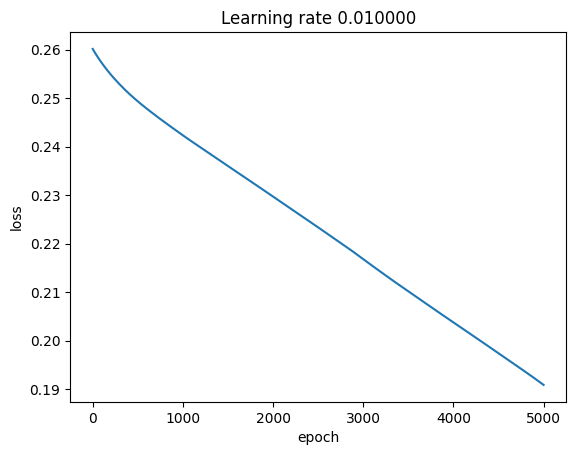

In [83]:
import torch
import torch.nn as nn

n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 100, 0.01

data_x = torch.randn(batch_size, n_input)
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

print(data_x.size())
print(data_y.size())

model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())
print(model)

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []
for epoch in range(5000):
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()   

Setting different learning rates in the optimizer for different models 

In [69]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import numpy as np

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# toy feed-forward net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# define random data
random_input = torch.randn((10,), requires_grad = True)
random_input2 = torch.randn((10,), requires_grad = True)
random_target = torch.randn((1,), requires_grad = True)
#random_input = torch.ones(10, requires_grad = True)
#random_target = torch.ones(1, requires_grad = True)

epochs = 10
iters = 10
cascade_depth = 4
nets = []

lrs = [0.001, 0.0007, 0.0003, 0.0001]

# define nets
for i in range(cascade_depth):
    net = Net()
    nets.append(net)

optimizer = torch.optim.Adam(nets[0].parameters(), lr=lrs[0])

# define optimizer
criterion = nn.MSELoss()

for i in range(1,cascade_depth):
    optimizer.add_param_group({'params': [*nets[i].parameters()], 'lr': lrs[i]})

#print the initial fc2 weight
print('nets[0] fc2 weight before train :')
print(nets[0].fc2.weight)
print('nets[3] fc2 weight before train :')
print(nets[3].fc2.weight)

for i in range(iters):
    loss1 = nets[0](random_input) - nets[1](random_input2)
    hidden_loss = 0.0
    for k in range(1,cascade_depth):
        if k < (cascade_depth-1):
            hidden_loss += nets[k](random_input) * nets[k+1](random_input2)
    loss = loss1 + hidden_loss

    # for k in range(cascade_depth):
    #     optimizers[k].zero_grad()

    optimizer.zero_grad()
    loss.backward()
    # for k in range(cascade_depth):   
    #     #loss.backward()
    #     loss.backward(retain_graph=True)
    
    optimizer.step()
    print(loss)
    
# print the trained fc2 weight
print('nets[0] fc2 weight after train :')
print(nets[0].fc2.weight)
print('nets[3] fc2 weight after retrain:')
print(nets[3].fc2.weight) 

nets[0] fc2 weight before train :
Parameter containing:
tensor([[-0.0939,  0.3407, -0.3503,  0.0387, -0.2518],
        [-0.1043, -0.1145,  0.0335,  0.4070,  0.2214],
        [-0.0019,  0.3175, -0.2292,  0.2305, -0.0415],
        [-0.0778,  0.0524, -0.3426,  0.0517,  0.1504],
        [ 0.3823, -0.1392,  0.1610,  0.4470, -0.1918]], requires_grad=True)
nets[3] fc2 weight before train :
Parameter containing:
tensor([[ 0.3588,  0.2814, -0.2614, -0.0471,  0.0668],
        [ 0.1278, -0.4142,  0.0200,  0.2330,  0.2525],
        [ 0.2200,  0.0707, -0.4290,  0.2943, -0.3521],
        [-0.2628,  0.0052,  0.1362,  0.2598, -0.0628],
        [-0.2302, -0.0385,  0.1465, -0.2516, -0.3884]], requires_grad=True)
tensor([1.0843], grad_fn=<AddBackward0>)
tensor([1.0658], grad_fn=<AddBackward0>)
tensor([1.0472], grad_fn=<AddBackward0>)
tensor([1.0287], grad_fn=<AddBackward0>)
tensor([1.0103], grad_fn=<AddBackward0>)
tensor([0.9919], grad_fn=<AddBackward0>)
tensor([0.9736], grad_fn=<AddBackward0>)
tensor([0

In [ ]:
def initialize_weights(m):
  if isinstance(m, nn.Conv2d):
      nn.init.kaiming_uniform_(m.weight.data,nonlinearity='relu')
      if m.bias is not None:
          nn.init.constant_(m.bias.data, 0)
  elif isinstance(m, nn.BatchNorm2d):
      nn.init.constant_(m.weight.data, 1)
      nn.init.constant_(m.bias.data, 0)
  elif isinstance(m, nn.Linear):
      nn.init.kaiming_uniform_(m.weight.data)
      nn.init.constant_(m.bias.data, 0)

def initialize_weights(m):
  if isinstance(m, nn.Conv2d):
      nn.init.kaiming_uniform_(m.weight.data,nonlinearity='relu')
      if m.bias is not None:
          nn.init.constant_(m.bias.data, 0)
  elif isinstance(m, nn.BatchNorm2d):
      nn.init.constant_(m.weight.data, 1)
      nn.init.constant_(m.bias.data, 0)
  elif isinstance(m, nn.Linear): # for tanh or sigmoid activations
      #nn.init.kaiming_uniform_(m.weight.data)
      nn.init.xavier_uniform(m.weight)
      nn.init.constant_(m.bias.data, 0)


In [6]:
import torch

cliprange = 0.2
cliprangeT = torch.tensor(cliprange)

min_lim = 1.0 - cliprangeT
max_lim = 1.0 + cliprangeT
log_min = torch.log(1.0 - cliprangeT)
log_max = torch.log(1.0 + cliprangeT)

print('min_lim', min_lim)
print('max_lim', max_lim)
print('log_min', log_min)
print('log_max', log_max)

a = torch.tensor(28)
b = torch.tensor(2)
clip_min = torch.tensor(-5)
clip_max = torch.tensor(5)
print(torch.exp(torch.clamp(a-b, clip_min, clip_max)))
print(torch.clamp(torch.exp(a-b), clip_min, clip_max))

min_lim tensor(0.8000)
max_lim tensor(1.2000)
log_min tensor(-0.2231)
log_max tensor(0.1823)
tensor(148.4132)
tensor(5.)


In [11]:
import torch

a = 8*torch.ones((2,10))
b = 2*torch.ones((10,))
c = 3*torch.ones((10,))
d = []
d.append(b)
d.append(c)

print(a)
print(b)
print(d)

ratios = [(curr-old) for (curr, old) in zip (d, a)]

print(ratios)


tensor([[8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
        [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.]])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
[tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]), tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])]
[tensor([-6., -6., -6., -6., -6., -6., -6., -6., -6., -6.]), tensor([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5.])]


In [7]:
a = 'hola'
a = a + '_2'
print(a)
a = a + '_3'
print(a)

hola_2
hola_2_3


In [32]:
import torch
d = {}
cascade = 4
d['model_state'] = 8*torch.ones((10))
if cascade > 1:
    d['hidden_model_state'] = [i*torch.ones((10)) for i in range(1,cascade)]

print(d['model_state'])
for k in range(1, cascade):
    print(d['hidden_model_state'][k-1]) 

for k in range(1,cascade):
    print(k)

tensor([8., 8., 8., 8., 8., 8., 8., 8., 8., 8.])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])
1
2
3


In [9]:
config = {}
config["env"] = "mini-grid"
config["env_config"] = {
    # Also works with:
    # - MiniGrid-MultiRoom-N4-S5-v0
    # - MiniGrid-MultiRoom-N2-S4-v0
    #"name": "MiniGrid-Empty-5x5-v0",
    "name": "MiniGrid-Empty-Random-6x6-v0",
    "framestack": 1,  # seems to work even w/o framestacking
}

print(config['env_config']['name'])
print(config.get('name'))

MiniGrid-Empty-Random-6x6-v0
None


Use of view() and permute()

In [22]:
import torch

a = torch.tensor(
    [[
    [1,2,3],
    [4,5,6],
    [7,8,9]],
    [
    [10,20,30],
    [40,50,60],
    [70,80,90]]]
    )
print(a
print(a.shape)
b = a.permute(1,2,0)
print(b)
print(b.shape)
c = a.view(3,3,2)
print(c)
print(c.shape)


tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 20, 30],
         [40, 50, 60],
         [70, 80, 90]]])
torch.Size([2, 3, 3])
tensor([[[ 1, 10],
         [ 2, 20],
         [ 3, 30]],

        [[ 4, 40],
         [ 5, 50],
         [ 6, 60]],

        [[ 7, 70],
         [ 8, 80],
         [ 9, 90]]])
torch.Size([3, 3, 2])
tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [20, 30]],

        [[40, 50],
         [60, 70],
         [80, 90]]])
torch.Size([3, 3, 2])


Test deterministc  actions

In [ ]:
a = torch.tensor(
    [[0.25, 0.75],
    [0.55, 0.45],
    [0.35, 0.85]]
)
print(a)
print(a.max(1, keepdim=True)[1])

In [4]:
import torch

m = torch.nn.Dropout(p=0.2)
input = torch.randn(4, 5)
print(input)
output = m(input)
print(output[0])

tensor([[ 0.5855,  0.1795,  1.1568, -1.6501,  0.2094],
        [-1.8994, -0.4485,  0.3780, -0.3433,  1.2660],
        [ 0.2029, -0.8991, -1.0801, -0.6135,  1.7004],
        [-0.0956, -0.6260, -1.3499,  0.0529, -1.5415]])
tensor([ 0.0000,  0.0000,  1.4460, -2.0626,  0.2618])


Test CNN shapes

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

in_features_next_layer = 576
memory_layer_size = 256
obs = torch.randn(1, 3, 56, 56) 

conv1 = nn.Conv2d(obs.shape[1], 32, 8, 4,)
conv2 = nn.Conv2d(32, 64, 4, 2, 0)
conv3 = nn.Conv2d(64, 64, 3, 1, 0)
lin_hidden = nn.Linear(in_features_next_layer, memory_layer_size)

h = obs
batch_size = h.shape[0]
# Propagate input through the visual encoder
h = F.relu(conv1(h))
h = F.relu(conv2(h))
h = F.relu(conv3(h))
# Flatten the output of the convolutional layers
h = h.reshape((batch_size, -1))

h2 = F.relu(lin_hidden(h))


In [ ]:
print(h.shape)
print(h2.shape)

In [ ]:
print(1e5//512//16)

Tensor type

In [2]:
import torch

# create a tensor of floats
x = torch.tensor([0.5, 1.0, 1.5, 2.0])

# try to apply the "~" operator to the tensor of floats
try:
    y = ~x
except TypeError as e:
    print(e)

# convert the tensor to an integer type and apply the "~" operator
x = x.type(torch.int)
y = ~x

print(y)


~ (operator.invert) is only implemented on integer and Boolean-type tensors
tensor([-1, -2, -2, -3], dtype=torch.int32)


In [21]:
import torch
# self.memory = torch.zeros((self.num_workers, self.max_episode_length, self.num_blocks, self.embed_dim), dtype=torch.float32)
# self.memory_mask = torch.tril(torch.ones((self.memory_length, self.memory_length)), diagonal=-1)
# buffer self.memory_mask = torch.zeros((self.n_workers, self.worker_steps, self.memory_length), dtype=torch.bool)
#worker_current_episode_step = torch.zeros((self.num_workers, ), dtype=torch.long)
# buffer_memory_mask[:, t] = memory_mask[torch.clip(self.worker_current_episode_step, 0, self.memory_length - 1)]

worker_current_episode_step = torch.zeros((1, ), dtype=torch.long)
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1
worker_current_episode_step[0] +=1


buffer_memory_mask = torch.zeros((1, 12, 4), dtype=torch.bool)

memory = torch.zeros((1, 8, 1, 6), dtype=torch.float32)
memory_mask = torch.tril(torch.ones((4, 4)), diagonal=-1)

buffer_memory_mask[:, 11] = memory_mask[torch.clip(worker_current_episode_step, 0, 4 - 1)]

# print(memory)
# print(memory_mask)
# print(buffer_memory_mask)
#print(worker_current_episode_step)

print(buffer_memory_mask[:, 11])


tensor([[ True,  True,  True, False]])


In [40]:
import torch

# create a floating point tensor
x = torch.tensor([1., 1., 0.00000001, 1.])

# convert the tensor to an integer
x2 = x.to(torch.int)

# print the new tensor
print(x2)
print(x2.dtype == torch.bool)  

x3 = x2.to(torch.bool)
print(x3)
print(x3.dtype == torch.bool)

x4 = x.to(torch.bool)
print(x4)
print(x4.dtype == torch.bool)

x5 = x.to(torch.int).to(torch.bool)
print(x5)
print(x5.dtype == torch.bool)



tensor([1, 1, 0, 1], dtype=torch.int32)
False
tensor([ True,  True, False,  True])
True
tensor([True, True, True, True])
True
tensor([ True,  True, False,  True])
True


In [4]:
import torch
torch.manual_seed(2**64-1)

In [20]:
segment_size = (2**64-1)//3
seed1 = (segment_size - 0)//2
seed2 = segment_size + segment_size//2
seed3 = segment_size*2 + segment_size//2
print(seed1)
print(seed2)
print(seed3)

3074457345618258602
9223372036854775807
15372286728091293012


In [29]:
import torch
from torch.autograd import Variable
a = Variable(torch.rand(1, 4), requires_grad=True)
b = a**2
c = b*2
d = c.mean()
e = c.sum()

print(a)
print(b)
print(c)
print(d)
print(e)

tensor([[0.0780, 0.0853, 0.3118, 0.4499]], requires_grad=True)
tensor([[0.0061, 0.0073, 0.0972, 0.2024]], grad_fn=<PowBackward0>)
tensor([[0.0122, 0.0145, 0.1944, 0.4048]], grad_fn=<MulBackward0>)
tensor(0.1565, grad_fn=<MeanBackward0>)
tensor(0.6260, grad_fn=<SumBackward0>)


In [30]:
d.backward(retain_graph=True) # fine
print(d)
e.backward(retain_graph=True) # fine
print(e)
d.backward() # also fine
print(d)


tensor(0.1565, grad_fn=<MeanBackward0>)
tensor(0.6260, grad_fn=<SumBackward0>)
tensor(0.1565, grad_fn=<MeanBackward0>)


In [31]:
e.backward(retain_graph=True) # fine

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [36]:
import torch

# Step 1: Define a tensor and make sure requires_grad=True so that it tracks operations
x = torch.tensor([3.0], requires_grad=True)

# Step 2: Define a simple function
y = x ** 2

# Step 3: Use torch.autograd.grad to compute the gradient
dy_dx = torch.autograd.grad(outputs=y, inputs=x)[0]
print(dy_dx)  # This should print: tensor([6.]), since dy/dx = 2*x and x=3

if dy_dx.grad_fn:
    print("The grad_fn is:", dy_dx.grad_fn)
else:
    print("None.")

if y.grad_fn:
    print("The grad_fn is:", y.grad_fn)
else:
    print("None.")

tensor([6.])
None.
The grad_fn is: <PowBackward0 object at 0x1365d9950>


In [43]:
import torch

# Step 1: Initialize tensors with requires_grad=True so that they track operations
x = torch.tensor([2.0])
w = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([0.5], requires_grad=True)

# Step 2: Define the forward pass (compute y)
y = w * x + b

# Step 3: Define a target value and compute the loss
target = torch.tensor([4.5])
loss = (y - target) ** 2

# Step 4: Backward pass to compute gradients
loss.backward()

# Print gradients
print("Gradient of loss w.r.t w:", w.grad)
print("Gradient of loss w.r.t b:", b.grad)

Gradient of loss w.r.t w: tensor([-8.])
Gradient of loss w.r.t b: tensor([-4.])


In [10]:
import torch

initial_tensor = torch.tensor([1., 2.])
reshaped_tensor = initial_tensor.view(1, 2)
print(initial_tensor)
print(reshaped_tensor)
print(reshaped_tensor[0])


second_tensor = torch.tensor([0.5, 0.4]).view(1, 2)
reshaped_tensor = torch.cat((reshaped_tensor, reshaped_tensor+second_tensor), dim=0)
print(reshaped_tensor)
#print(reshaped_tensor + second_tensor)
print(reshaped_tensor[1][1])



tensor([1., 2.])
tensor([[1., 2.]])
tensor([1., 2.])
tensor([[1.0000, 2.0000],
        [1.5000, 2.4000]])
tensor(2.4000)


In [11]:
import logging

logging.basicConfig(filename='reg_loss.log', level=logging.INFO)
logger = logging.getLogger(__name__)

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ActorCritic(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_actions):
        super(ActorCritic, self).__init__()

        # Actor Network
        self.actor = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, n_actions)
        )

        # Critic Network
        self.critic = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, state):
        action_probs = F.softmax(self.actor(state), dim=-1)
        value = self.critic(state)
        return action_probs, value

# Example of using the ActorCritic model
input_dim = 4  # For example, if state has 4 dimensions
hidden_dim = 128
n_actions = 2  # Number of possible actions

model = ActorCritic(input_dim, hidden_dim, n_actions)

# Test the model with a dummy state
state = torch.rand(1, input_dim)
action_probs, value = model(state)

print(action_probs)
print(value)

# Looping over all modules including nested ones
print("Using .modules():")
for module in model.modules():
    if isinstance(module, nn.Linear):
        print(module)

# Looping over the named parameters of the model
for name, param in model.named_parameters():
    print(f"Name: {name}, Size: {param.size()}")

# Looping over all Linear modules and then each module parameters
print("Using .modules():")
for module in model.modules():
    if isinstance(module, nn.Linear):
        print(module)
        for name, param in module.named_parameters():
            print(f"Name: {name}, Size: {param.size()}")


tensor([[0.5767, 0.4233]], grad_fn=<SoftmaxBackward0>)
tensor([[-0.1712]], grad_fn=<AddmmBackward0>)
Using .modules():
Linear(in_features=4, out_features=128, bias=True)
Linear(in_features=128, out_features=2, bias=True)
Linear(in_features=4, out_features=128, bias=True)
Linear(in_features=128, out_features=1, bias=True)
Name: actor.0.weight, Size: torch.Size([128, 4])
Name: actor.0.bias, Size: torch.Size([128])
Name: actor.2.weight, Size: torch.Size([2, 128])
Name: actor.2.bias, Size: torch.Size([2])
Name: critic.0.weight, Size: torch.Size([128, 4])
Name: critic.0.bias, Size: torch.Size([128])
Name: critic.2.weight, Size: torch.Size([1, 128])
Name: critic.2.bias, Size: torch.Size([1])
Using .modules():
Linear(in_features=4, out_features=128, bias=True)
Name: weight, Size: torch.Size([128, 4])
Name: bias, Size: torch.Size([128])
Linear(in_features=128, out_features=2, bias=True)
Name: weight, Size: torch.Size([2, 128])
Name: bias, Size: torch.Size([2])
Linear(in_features=4, out_feature

In [16]:
import torch

t = torch.tensor([[4., 2.]])
t.shape
t[0][0][t[0][0].abs() > 0] = 1


print(len(t[0]))

2


In [1]:
prune_percent = 50
prune_percent_decay = 0.8
prune_step = 10

for prune_iter in range(prune_step, prune_percent + prune_step, prune_step):
    print(prune_iter)

10
20
30
40
50


In [40]:
import torch

def apply_mask1(omega, percent):
    #mask = omega.clone()
    # for i in range(len(omega[0])):
    #     # Set all non-zero values to 1
    #     mask[0][i][mask[0][i].abs() > 0] = 1
    #     # Compute threshold as the given percentile
    #     threshold = torch.quantile(omega[0][i], percent / 100.0)
    #     # Set values below threshold to 0
    #     mask[0][i][omega[0][i] < threshold] = 0

    mask = omega.clone()
    # Convert all non-zero elements to 1
    mask[torch.abs(mask) > 0] = 1
    # Calculate the percentile threshold
    threshold = torch.quantile(omega.float(), percent / 100.0)
    print('threshold:', threshold)
    # Zero out values below the threshold
    mask[omega < threshold] = 0
    
    return mask

omega = torch.tensor([[0.006, 0.004]])
percent = 30
print(omega)
mask = apply_mask1(omega, percent)
print(mask)

tensor([[0.0060, 0.0040]])
threshold: tensor(0.0046)
tensor([[1., 0.]])


In [61]:
def apply_mask2(mask_pre, silence, step_percent):
    mask = torch.ones_like(mask_pre)
    # Filter the values in silence where mask_pre is zero
    s2 = silence[mask_pre == 0]
    # Check if s2 is empty, if so, set threshold to infinity
    if s2.nelement() == 0:
        threshold_current = torch.tensor(float('inf'))
    else:
        # Calculate the step_percent percentile value of s2
        threshold_current = torch.quantile(s2.float(), step_percent / 100.0)
    # Set values in m_a to zero based on the conditions
    mask[(mask_pre == 0) & (silence <= threshold_current)] = 0

    return mask

mask_pre = torch.tensor([[0., 1.]])
silence = torch.tensor([[0., 0.80001]])
percent = 30

mask = apply_mask2(mask_pre, silence, percent)

print(mask)



s2 tensor([0.])
threshold2 tensor(0.)
tensor([[0., 1.]])
